                                             K means Clustering                                                          

## K means Clustering

K-Means Clustering groups similar data points into clusters without needing labeled data. It is used to uncover hidden patterns when the goal is to organize data based on similarity.

* Helps identify natural groupings in unlabeled datasets
* Works by grouping points based on distance to cluster centers
* Commonly used in customer segmentation, image compression, and pattern discovery
* Useful when you need structure from raw, unorganized data

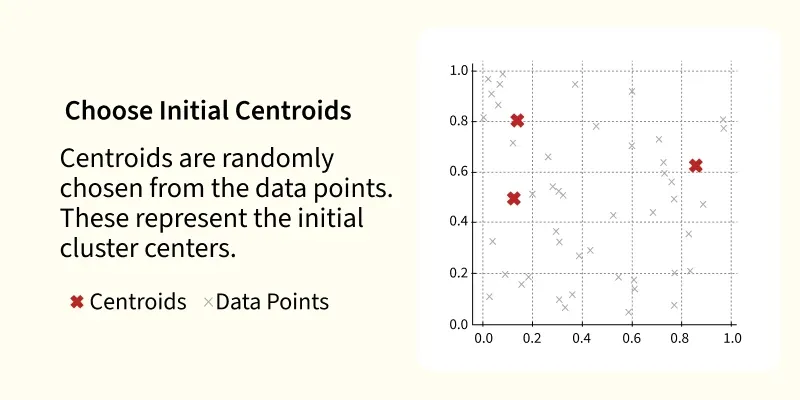

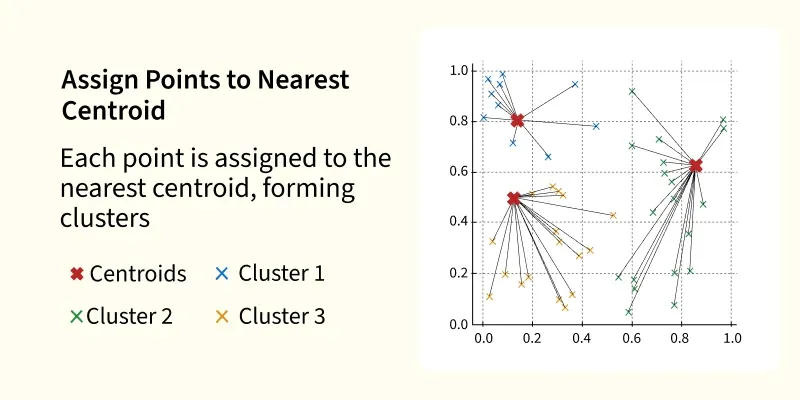

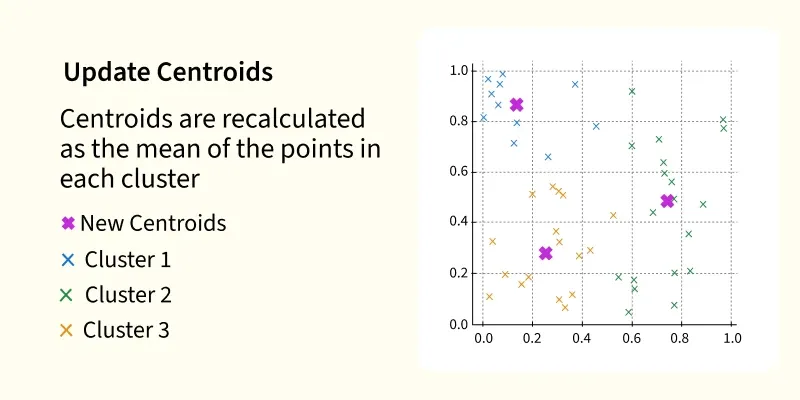

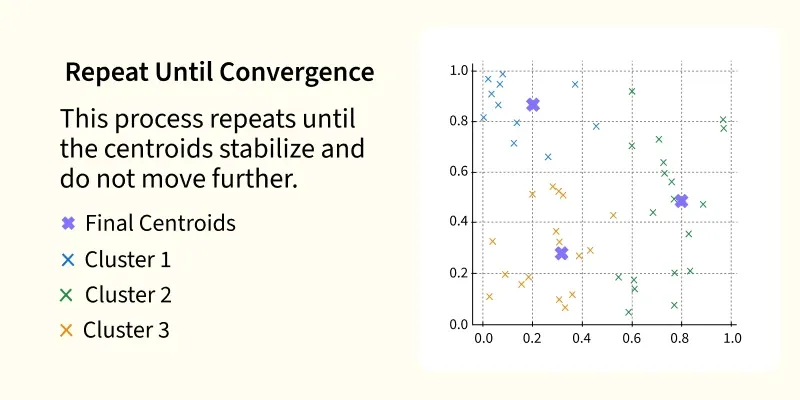

The algorithm will categorize the items into "k" groups or clusters of similarity. To calculate that similarity we will use the Euclidean distance as a measurement. The algorithm works as follows:  

* Initialization: We begin by randomly selecting k cluster centroids.
* Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
* Update Step: After the assignment, we recalculate the centroid of each cluster by averaging the points within it.
* Repeat: This process repeats until the centroids no longer change or the maximum number of iterations is reached.

The goal is to partition the dataset into k clusters such that data points within each cluster are more similar to each other than to those in other clusters.

**Selecting the right number of clusters is important for meaningful segmentation to do this we use Elbow Method for optimal value of k in KMeans which is a graphical tool used to determine the optimal number of clusters (k) in K-means.**

### Use of K-Means Clustering

* Customer Segmentation: Grouping customers based on purchasing behavior for targeted marketing.
* Image Compression: Reducing the number of colors in an image by clustering similar colors.
* Anomaly Detection: Identifying outliers in data by finding points that do not fit well into any cluster.
* Document Clustering: Organizing documents into topics based on content similarity.


## Implementation of K-Means Clustering

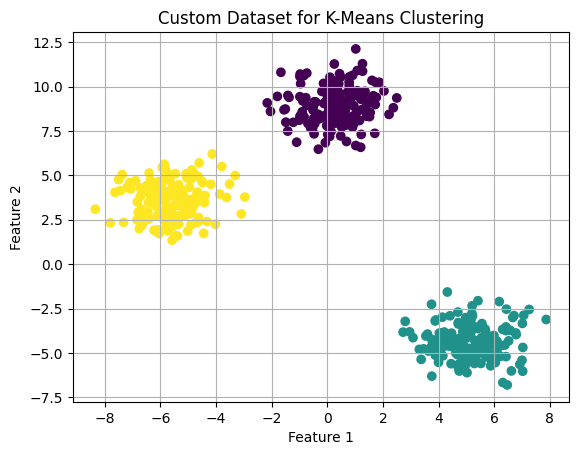

In [1]:
# import Liberaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create Custom Dataset

X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Custom Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

### Step 4: Plotting Random Initialized Center with Data Points

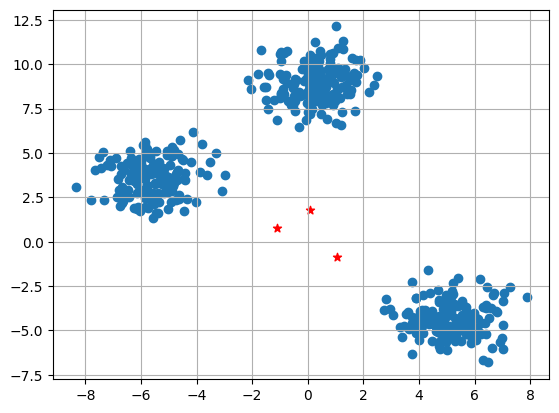

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

### Step 5: Defining Euclidean Distance

In [6]:
def euclidean_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

### Step 6: Creating Assign and Update Functions

In [7]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = euclidean_distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

### Step 7: Predicting the Cluster for the Data Points

In [8]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(euclidean_distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

### Step 8: Assigning, Updating and Predicting the Cluster Centers

In [9]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

### Step 9: Plotting Data Points with Predicted Cluster Centers

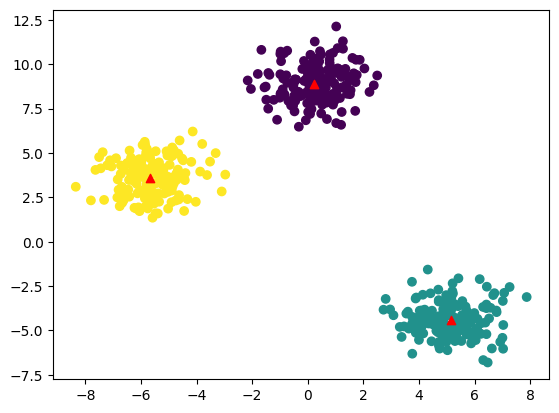

In [10]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

### Challenges with K-Means Clustering

* Choosing the Right Number of Clusters: Selecting an appropriate value for k can be challenging and may require domain knowledge or methods like the Elbow Method.
* Sensitivity to Initial Centroids: The initial placement of centroids can affect the final clusters, leading to different results on different runs.
* Assumes Spherical Clusters: K-Means assumes clusters are spherical and equally sized, which may not hold true for all datasets.
* Handling Outliers: K-Means is sensitive to outliers, which can skew the centroids and affect cluster assignments.
* Scalability: While K-Means is efficient for small to medium-sized datasets, it may struggle with very large datasets or high-dimensional data.

## Techniques to find Optimal value of k

* Elbow Method: Plotting the explained variance as a function of the number of clusters and looking for an "elbow" point where the rate of decrease sharply changes.

* Silhouette Score: Measuring how similar an object is to its own cluster compared to other clusters, with higher scores indicating better-defined clusters.

* Gap Statistic: Comparing the total intra-cluster variation for different values of k with their expected values under a null reference distribution of the data.

* Cross-Validation: Using techniques like k-fold cross-validation to evaluate the stability and performance of clustering for different k values.

## 1. Elbow method

Elbow method is a technique used to choose the best number of clusters for K-Means clustering. The basic idea is to see how the inertia (cost) changes as we increase the number of clusters.

* Inertia is the sum of squared distances from each data point to the center of its assigned cluster. It tells us how well the points are grouped in their clusters. The smaller the inertia the better the clustering.
* We plot the inertia for different values of K i.e different numbers of clusters. As K increases the inertia decrease because more clusters allow data points to be closer to their cluster centers.
* The goal is to find the value of K where the decrease in inertia starts to slow down. This is like an "elbow" in the plot where the curve bends and flattens out. The number of clusters at this point is considered the optimal value for K.

## 2. Silhouette Method

Silhouette Method measures how similar each data point is to its own cluster compared to other clusters. It calculates a score for each point which tells us if the point is well-clustered. A higher score means the point is close to its own cluster and far from others. The Silhouette Score ranges from -1 to +1:

* +1 means the point is well-placed in its cluster.
* 0 means the point is on the boundary between clusters.
* -1 means the point is in the wrong cluster.

## 3. Gap Statistic 

Gap Statistic compares the clustering result with a randomly distributed data to determine how well the clustering structure fits the data.

* It measures the difference between the total within-cluster variation (inertia) of actual data and of random data.
* The idea is that the actual clustering should have much lower inertia compared to random data.
* We compute the Gap Statistic for different K values. The optimal K is the one that maximizes the gap meaning that the clustering is significantly better than random clustering.

## 4. Davies-Bouldin Index
Davies-Bouldin Index evaluates how well-separated the clusters are by looking at the average similarity between each cluster and its most similar cluster.

* For each pair of clusters it computes the ratio of sum of within-cluster spread (how tight cluster is) to the distance between the clusters.
* A lower DBI value means better clustering because it indicates that the clusters are compact and well-separated.
* We compute the DBI for different values of K and the best K is the one that gives the lowest DBI.

                              K-means++ Algorithm - ML                         

## K-means++ Algorithm - ML

Clustering is used to group similar data points. K-Means is a commonly used clustering method, but it often gives poor results because the initial cluster centers are chosen randomly. This may lead to empty clusters, overlapping clusters or centroids falling too close to each other.

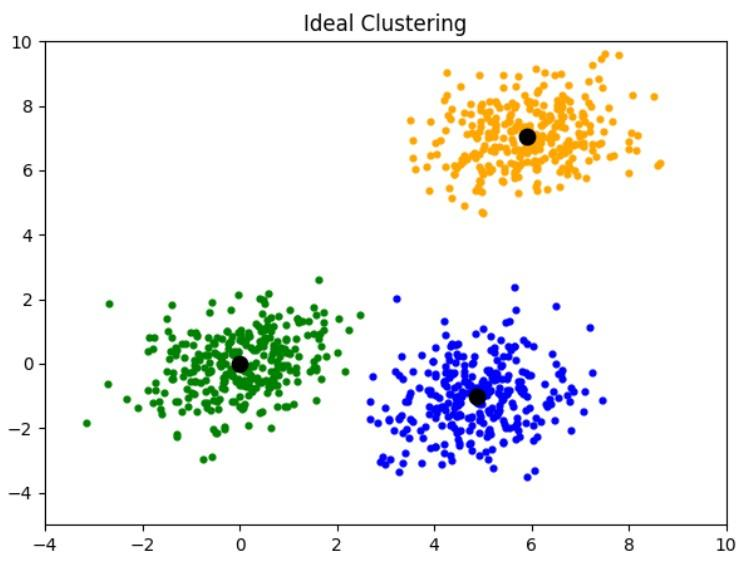

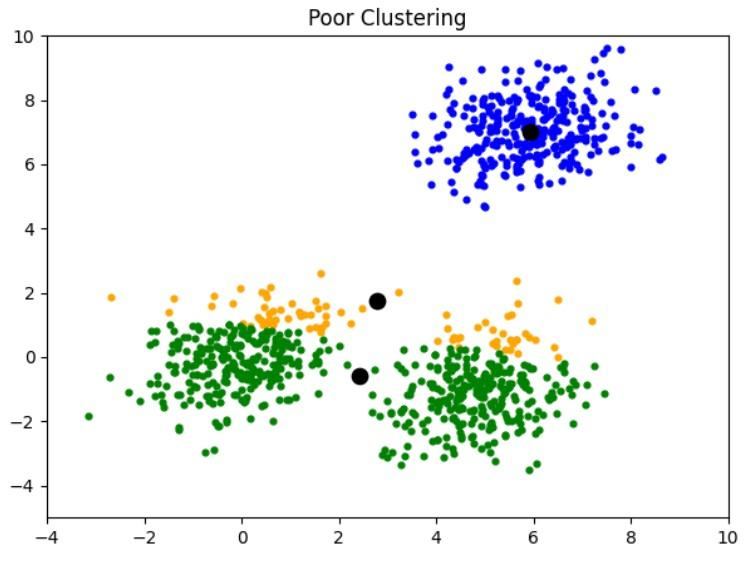

For example, the outputs below show how K-Means can form incorrect clusters due to weak initialization. To fix this, K-Means++ was introduced. It improves the way initial centroids are selected so that the clustering becomes more stable, accurate and faster.

**K-Means++** is an improved version of the K-Means algorithm. Instead of picking all centroids randomly, it chooses the first center randomly and then selects the remaining centers in a spaced-out manner. This ensures:

* Better cluster separation.
* Faster convergence.
* More consistent results compared to K-Means.

## How K-mean++ Algorithm Works

K-means++ revolutionizes the initialization step while keeping the rest of the K-means algorithm intact. The key insight is deceptively simple: spread out the initial centers as much as possible.

### The Initialization Process

1. **First Center**: The first center is chosen randomly from the data points.
2. **Subsequent Centers**: For each subsequent center, the algorithm calculates the distance from each data point to the nearest existing center. The next center is then chosen with a probability proportional to the square of this distance. This means that points farther from existing centers are more likely to be selected as new centers.
3. **Repeat**: This process continues until k centers have been chosen.

## Implementation in Python


### 1. Dataset Creation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

### 2. Plotting Helper Function

This function is used to visualize the data points and the selected centroids at each step. All data points are shown in gray.

* Previously selected centroids are marked in black.
* The current centroid being added is marked in red.
* This helps visualize the centroid initialization process step by step.

In [12]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

### 3. Euclidean Distance Function

In [15]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

### 4. K-Means++ Initialization

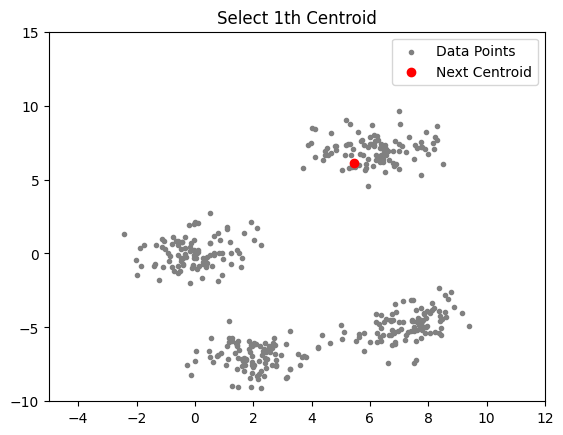

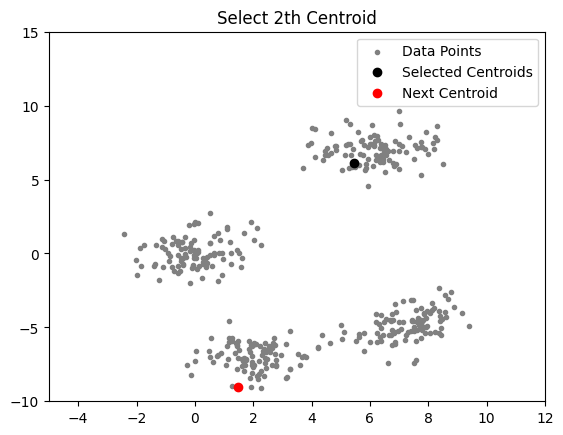

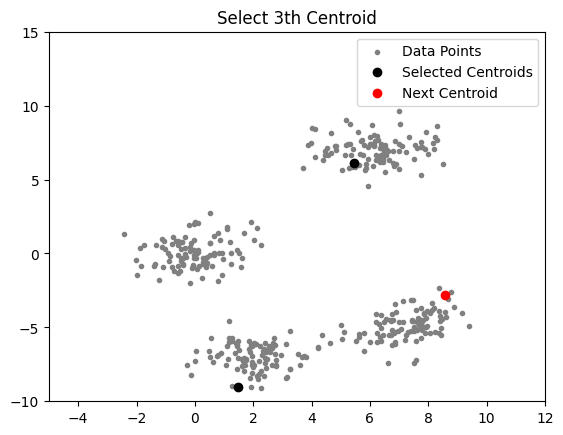

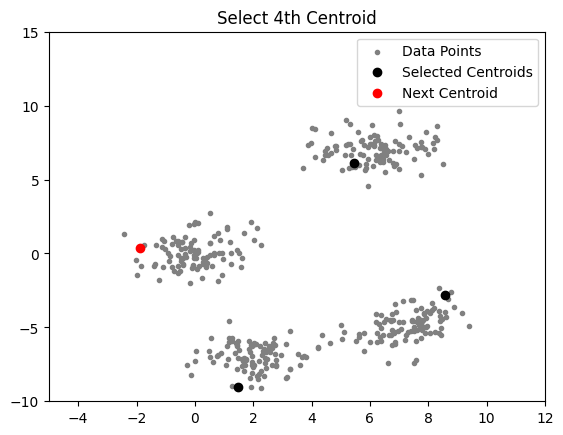

In [16]:
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    plot(data, np.array(centroids))

    for _ in range(k - 1):
        distances = []
        for point in data:
            min_dist = min([distance(point, c) for c in centroids])
            distances.append(min_dist)
        
        next_centroid = data[np.argmax(distances)]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))
    
    return np.array(centroids)

# Run initialization
centroids = initialize(data, k=4)

# K-Mode Clustering in Python

K-mode clustering is an unsupervised machine-learning used to group categorical data into k clusters (groups). The K-Modes clustering partitions the data into two mutually exclusive groups. Unlike K-Means which uses distances between numbers K-Modes uses the number of mismatches between categorical values to decide how similar two data points are. For example:

* Data point 1: ["red", "small", "round"]
* Data point 2: ["blue", "small", "square"]